In [ ]:
import re
import pylab
import pandas as pd
import numpy as np
# from mlutils import dataset, connector
import scipy.stats
from scipy.stats import *
from sklearn.preprocessing import StandardScaler
import math
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm 
import seaborn as sns
import pylab as py
from urllib.error import HTTPError
import pprint
%matplotlib inline

In [ ]:
#Devanshh
columns=['Year','Month','Day','Hour', 'GHI']
url_prefix_list = ['https://raw.githubusercontent.com/bikashjena2304/Renewable-energy-data/main/Rajasthan1/15396_26.65_71.65_',
                   'https://raw.githubusercontent.com/bikashjena2304/Renewable-energy-data/main/Rajasthan2/21004_26.45_73.35_',
                   'https://raw.githubusercontent.com/bikashjena2304/Renewable-energy-data/main/Rajasthan3/20012_26.25_73.05_',
                   'https://raw.githubusercontent.com/bikashjena2304/Renewable-energy-data/main/Rajasthan4/19019_25.95_72.75_',
                   'https://raw.githubusercontent.com/bikashjena2304/Renewable-energy-data/main/Rajasthan5/17036_25.65_72.15_'
                   ]

In [ ]:
def get_solar_park_dataframe(url_prefix_string):
  df_raw = pd.DataFrame()
  for year in range(2000,2015):
    # print(url_prefix_string + str(year) + '')
    try:
        df_temp = pd.read_csv(url_prefix_string + str(year) + '.csv', skiprows=range(0,2))
      
        if year == 2000:
            df_raw = df_raw.append(df_temp)

        else:
            df_temp = df_temp.iloc[1:]
            df_raw = df_raw.append(df_temp)
    
    except HTTPError:
      continue
  
  return pd.DataFrame(df_raw[columns])



In [ ]:
def get_all_parks_dataframe(url_prefix_list):
  df_list_raw = list()
  for url in url_prefix_list:
    df_list_raw.append(get_solar_park_dataframe(url))

  return df_list_raw

In [ ]:
#Read all datasets

df_list_raw = get_all_parks_dataframe(url_prefix_list)


In [ ]:
df_list = list(df_list_raw)

In [ ]:
df_list[0].dtypes

Year     int64
Month    int64
Day      int64
Hour     int64
GHI      int64
dtype: object

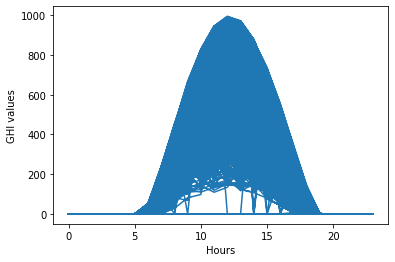

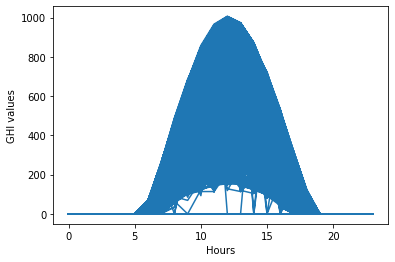

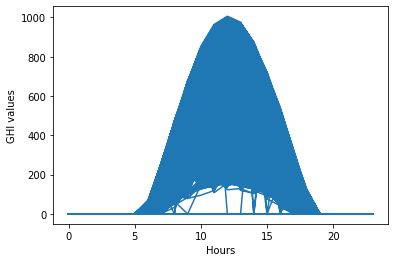

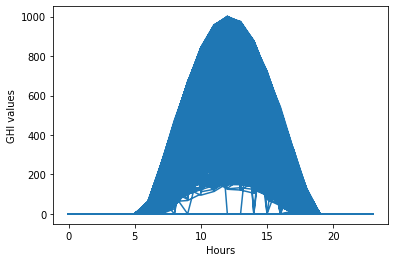

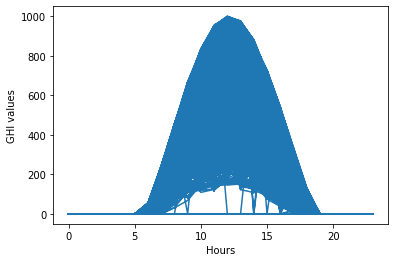

In [ ]:
for df in df_list:
  plt.plot(df['Hour'], df['GHI'])

  plt.title('')
  plt.xlabel('Hours')
  plt.ylabel('GHI values')
  plt.show()

In [ ]:
#Devanshh
# df_raw = get_solar_park_dataframe(url_prefix)
# df_raw.head(100)
# df_raw.shape
# df_list = [df[df['GHI'] > 0] for df in df_list]
df_list = [df[df['Hour'] >= 6] for df in df_list]
df_list = [df[df['Hour'] <= 18] for df in df_list]

for df in df_list:
  
  df['GHI'] = pd.to_numeric(df['GHI'], downcast='float')
#   df['GHI'] = df['GHI'].replace(0.0,1.0)
  df = df.reset_index(drop=True, inplace=True)


print([df.head(10) for df in df_list])


[   Year  Month  Day  Hour    GHI
0  2000      1    1     6    0.0
1  2000      1    1     7    0.0
2  2000      1    1     8  135.0
3  2000      1    1     9  331.0
4  2000      1    1    10  488.0
5  2000      1    1    11  608.0
6  2000      1    1    12  664.0
7  2000      1    1    13  671.0
8  2000      1    1    14  584.0
9  2000      1    1    15  438.0,    Year  Month  Day  Hour    GHI
0  2000      1    1     6    0.0
1  2000      1    1     7    0.0
2  2000      1    1     8  159.0
3  2000      1    1     9  355.0
4  2000      1    1    10  530.0
5  2000      1    1    11  644.0
6  2000      1    1    12  692.0
7  2000      1    1    13  668.0
8  2000      1    1    14  575.0
9  2000      1    1    15  422.0,    Year  Month  Day  Hour    GHI
0  2000      1    1     6    0.0
1  2000      1    1     7    0.0
2  2000      1    1     8  161.0
3  2000      1    1     9  360.0
4  2000      1    1    10  529.0
5  2000      1    1    11  645.0
6  2000      1    1    12  694.0
7  2000

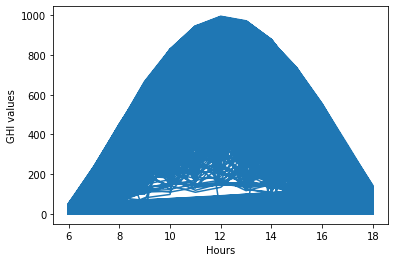

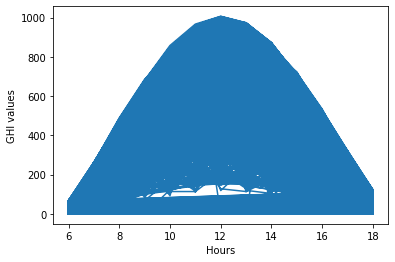

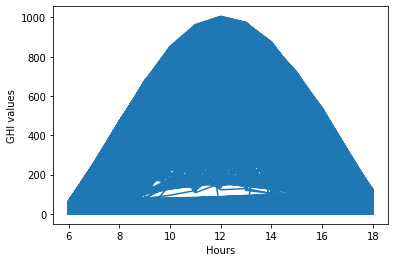

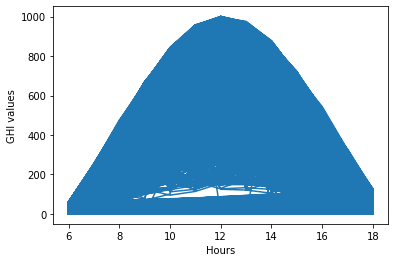

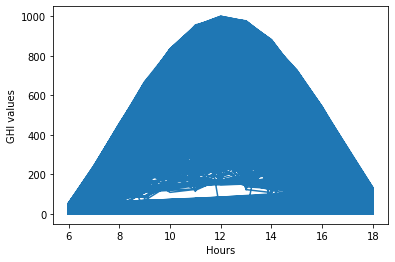

In [ ]:
for df in df_list:
  plt.plot(df['Hour'], df['GHI'])

  plt.title('')
  plt.xlabel('Hours')
  plt.ylabel('GHI values')
  plt.show()

Text(0.5, 1.0, 'Solar Park 1')

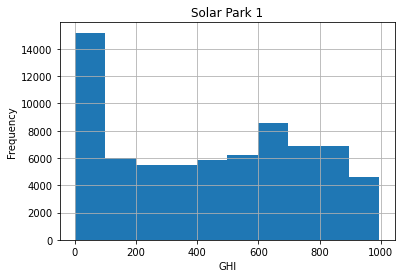

In [ ]:
hist0 = df_list[0]['GHI'].hist()
hist0.set_xlabel('GHI')
hist0.set_ylabel('Frequency')
hist0.set_title('Solar Park 1')

Text(0.5, 1.0, 'Solar Park 2')

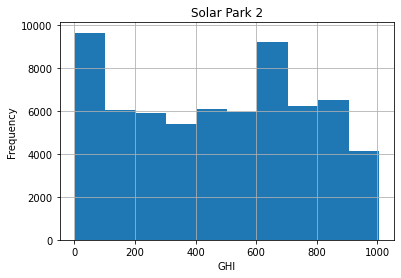

In [ ]:
hist1 = df_list[1]['GHI'].hist()
hist1.set_xlabel('GHI')
hist1.set_ylabel('Frequency')
hist1.set_title('Solar Park 2')

Text(0.5, 1.0, 'Solar Park 3')

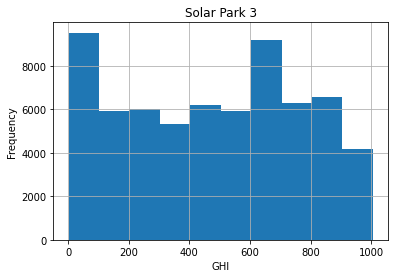

In [ ]:
hist2 = df_list[2]['GHI'].hist()
hist2.set_xlabel('GHI')
hist2.set_ylabel('Frequency')
hist2.set_title('Solar Park 3')

Text(0.5, 1.0, 'Solar Park 4')

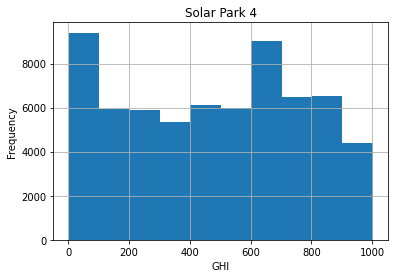

In [ ]:
hist3 = df_list[3]['GHI'].hist()
hist3.set_xlabel('GHI')
hist3.set_ylabel('Frequency')
hist3.set_title('Solar Park 4')

Text(0.5, 1.0, 'Solar Park 5')

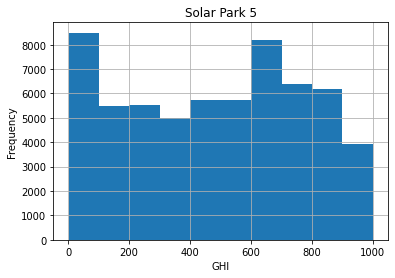

In [ ]:
hist4 = df_list[4]['GHI'].hist()
hist4.set_xlabel('GHI')
hist4.set_ylabel('Frequency')
hist4.set_title('Solar Park 5')

In [ ]:
def standardise(df, column, pct, pct_lower):
    sc = StandardScaler() 
    y = df[column].to_list()
    y.sort()
    for x in range(0,5000):
      print(x)
      print('\n')
    len_y = len(y)
    y = y[int(pct_lower * len_y):int(len_y * pct)]
    len_y = len(y)
    yy =([[x] for x in y if x != 0])
    # print(type(yy[0]))
    # for x in yy:
    #   print(x)
    #   # print('\n')
    sc.fit(yy)
    y_std = sc.transform(yy)
    print(y_std)
    y_std = y_std.flatten()
    return y_std,len_y,y

In [ ]:
def fit_distribution(df, column, pct, pct_lower):
    # Set up list of candidate distributions to use
    # See https://docs.scipy.org/doc/scipy/reference/stats.html for more
    y_std,size,y_org = standardise(df, column,pct,pct_lower)
    dist_names = ['weibull_min','norm','weibull_max','beta',
                 'invgauss','uniform','gamma','expon', 'lognorm','pearson3','triang']

    chi_square_statistics = []
    # 11 bins
    percentile_bins = np.linspace(0,100,11)
    percentile_cutoffs = np.percentile(y_std, percentile_bins)
    observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
    cum_observed_frequency = np.cumsum(observed_frequency)

    # Loop through candidate distributions

    for distribution in dist_names:
        # Set up distribution and get fitted distribution parameters
        dist = getattr(scipy.stats, distribution)
        param = dist.fit(y_std)
        print("{}\n{}\n".format(dist, param))
      

        # Get expected counts in percentile bins
        # cdf of fitted sistrinution across bins
        cdf_fitted = dist.cdf(percentile_cutoffs, *param)
        expected_frequency = []
        for bin in range(len(percentile_bins)-1):
            expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
            expected_frequency.append(expected_cdf_area)

        # Chi-square Statistics
        expected_frequency = np.array(expected_frequency) * size
        print(expected_frequency)
        cum_expected_frequency = np.cumsum(expected_frequency)
        ss = sum(((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
        print(ss)
        chi_square_statistics.append(ss)


    #Sort by minimum ch-square statistics
    results = pd.DataFrame()
    results['Distribution'] = dist_names
    results['chi_square'] = chi_square_statistics
    results.sort_values(['chi_square'], inplace=True)


    print ('\nDistributions listed by Betterment of fit:')
    print ('............................................')
    print (results)

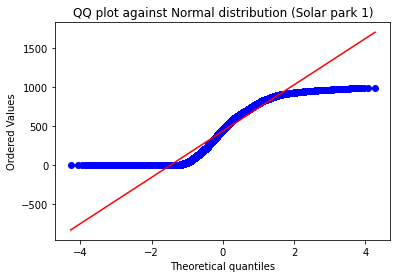

In [ ]:
scipy.stats.probplot(df_list[0]['GHI'], dist='norm', plot=pylab)
plt.title('QQ plot against Normal distribution (Solar park 1)')
plt.show()

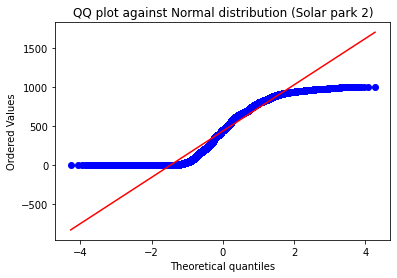

In [ ]:
scipy.stats.probplot(df_list[1]['GHI'], dist='norm', plot=pylab)
plt.title('QQ plot against Normal distribution (Solar park 2)')
plt.show()

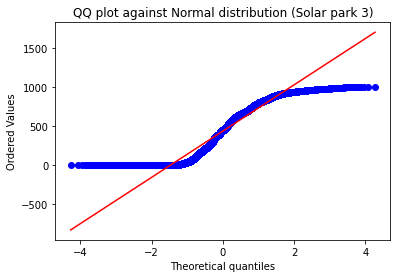

In [ ]:
scipy.stats.probplot(df_list[2]['GHI'], dist='norm', plot=pylab)
plt.title('QQ plot against Normal distribution (Solar park 3)')
plt.show()

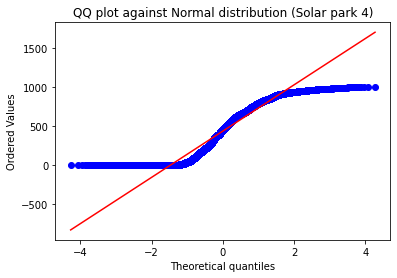

In [ ]:
scipy.stats.probplot(df_list[3]['GHI'], dist='norm', plot=pylab)
plt.title('QQ plot against Normal distribution (Solar park 4)')
plt.show()

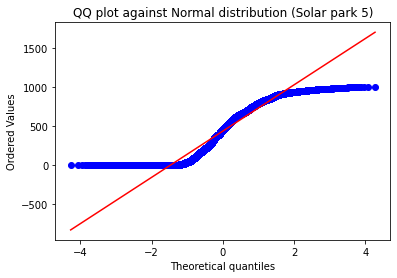

In [ ]:
scipy.stats.probplot(df_list[3]['GHI'], dist='norm', plot=pylab)
plt.title('QQ plot against Normal distribution (Solar park 5)')
plt.show()

In [ ]:
statistic,pvalue = scipy.stats.normaltest(df_list[0]['GHI'])
print(str(statistic) +'\t'+ str(pvalue))
if pvalue > 0.05:
  print('normal distribution')
else:
  print('not normal distribution')

87006.4256605481	0.0
not normal distribution


In [ ]:
!pip install fitter

     |████████████████████████████████| 51kB 3.7MB/s 
  Created wheel for fitter: filename=fitter-1.3.0-cp37-none-any.whl size=24742 sha256=b613e0e48ebaef31442cdb0d564182013381e471bbbf0c450a6228203c97d479
  Stored in directory: /root/.cache/pip/wheels/80/d8/0f/3dba85fa574e0e489ca900bb0055d3394c103ae46210d04945
  Created wheel for easydev: filename=easydev-0.11.0-cp37-none-any.whl size=64244 sha256=56d6635d13847174d14b7906f75ba98ad8f44d755306ddbc74fc6c5a88d1f6aa
  Stored in directory: /root/.cache/pip/wheels/17/69/b5/771949d8100a30aa33e4bc5d0ff77eced9063284891ce26898
Successfully built fitter easydev


AttributeError: ignored

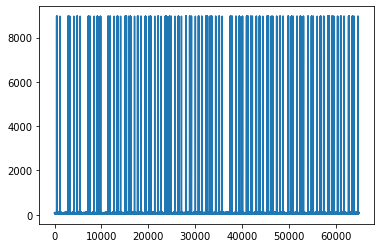

In [ ]:
y = df_list[0]['GHI'].to_list()
dist_names = ['beta', 'weibull']
for dist in dist_names:
    dist_attr = getattr(scipy.stats, dist)
    params = dist_attr.fit(y)
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    if arg:
        pdf = dist_attr.pdf(y, *arg, loc=loc, scale=scale) * len(y)
    else:
        pdf = dist_attr.pdf(y, loc=loc, scale=loc)*len(y)
    
    plt.plot(pdf, label=dist)

plt.show()
    

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


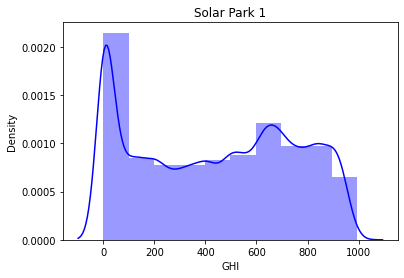

In [ ]:
y = df_list[0]['GHI']
SR_y = pd.Series(y, name="GHI")

fig, ax = plt.subplots()
sns.distplot(SR_y, bins=10, color="b", ax=ax)

plt.title('Solar Park 1')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


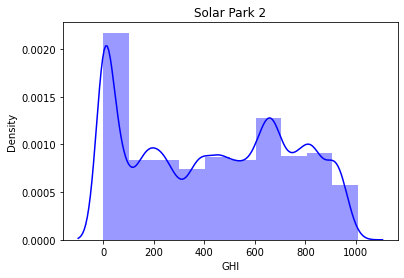

In [ ]:
y = df_list[1]['GHI']
SR_y = pd.Series(y, name="GHI")

fig, ax = plt.subplots()
sns.distplot(SR_y, bins=10, color="b", ax=ax)

plt.title('Solar Park 2')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


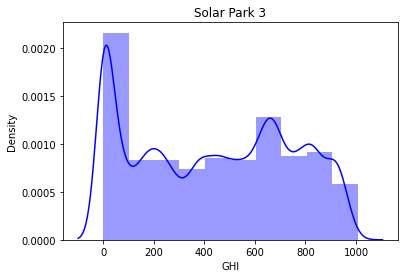

In [ ]:
y = df_list[2]['GHI']
SR_y = pd.Series(y, name="GHI")

fig, ax = plt.subplots()
sns.distplot(SR_y, bins=10, color="b", ax=ax)

plt.title('Solar Park 3')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


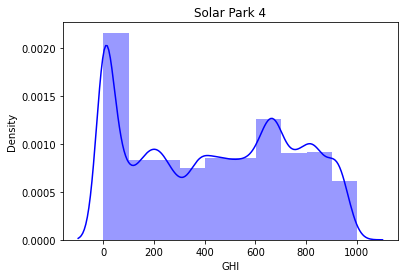

In [ ]:
y = df_list[3]['GHI']
SR_y = pd.Series(y, name="GHI")

fig, ax = plt.subplots()
sns.distplot(SR_y, bins=10, color="b", ax=ax)

plt.title('Solar Park 4')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


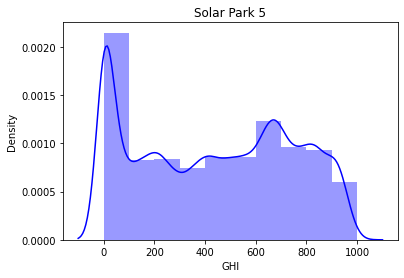

In [ ]:
y = df_list[4]['GHI']
SR_y = pd.Series(y, name="GHI")

fig, ax = plt.subplots()
sns.distplot(SR_y, bins=10, color="b", ax=ax)

plt.title('Solar Park 5')
plt.show()

In [ ]:
beta.fit(pd.Series(df_list[0]['GHI']))

',Year,Month,Day,Hour,GHI\n0,2000,1,1,6,0.0\n1,2000,1,1,7,0.0\n2,2000,1,1,8,135.0\n3,2000,1,1,9,331.0\n4,2000,1,1,10,488.0\n5,2000,1,1,11,608.0\n6,2000,1,1,12,664.0\n7,2000,1,1,13,671.0\n8,2000,1,1,14,584.0\n9,2000,1,1,15,438.0\n10,2000,1,1,16,243.0\n11,2000,1,1,17,42.0\n12,2000,1,1,18,0.0\n13,2000,1,2,6,0.0\n14,2000,1,2,7,0.0\n15,2000,1,2,8,124.0\n16,2000,1,2,9,319.0\n17,2000,1,2,10,495.0\n18,2000,1,2,11,602.0\n19,2000,1,2,12,657.0\n20,2000,1,2,13,670.0\n21,2000,1,2,14,585.0\n22,2000,1,2,15,439.0\n23,2000,1,2,16,250.0\n24,2000,1,2,17,44.0\n25,2000,1,2,18,0.0\n26,2000,1,3,6,0.0\n27,2000,1,3,7,0.0\n28,2000,1,3,8,136.0\n29,2000,1,3,9,338.0\n30,2000,1,3,10,500.0\n31,2000,1,3,11,618.0\n32,2000,1,3,12,673.0\n33,2000,1,3,13,659.0\n34,2000,1,3,14,577.0\n35,2000,1,3,15,436.0\n36,2000,1,3,16,254.0\n37,2000,1,3,17,42.0\n38,2000,1,3,18,0.0\n39,2000,1,4,6,0.0\n40,2000,1,4,7,0.0\n41,2000,1,4,8,136.0\n42,2000,1,4,9,330.0\n43,2000,1,4,10,496.0\n44,2000,1,4,11,613.0\n45,2000,1,4,12,671.0\n46,2000,1,4,